In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

data = pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/digit re/digit-recognizer/train.csv')
data_test=pd.read_csv('C:/Users/DELL/OneDrive/DATA Science/digit re/digit-recognizer/test.csv')

In [2]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
y_train = data['label']
X_train = data.iloc[:, 1:].values 

In [4]:
print(f"X_train shape: {X_train.shape}")
print(f"X_test shape: {data_test.shape}")
print(f"y_train shape: {y_train.shape}")

X_train shape: (42000, 784)
X_test shape: (28000, 784)
y_train shape: (42000,)


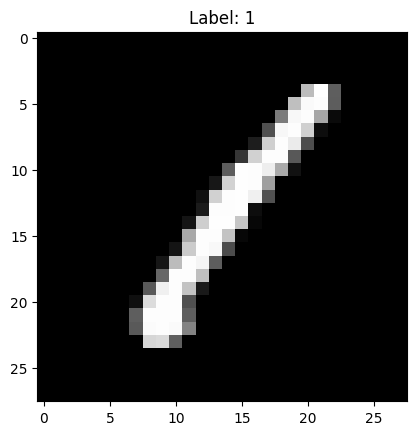

In [5]:
image = X_train[0].reshape(28, 28)

plt.imshow(image, cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

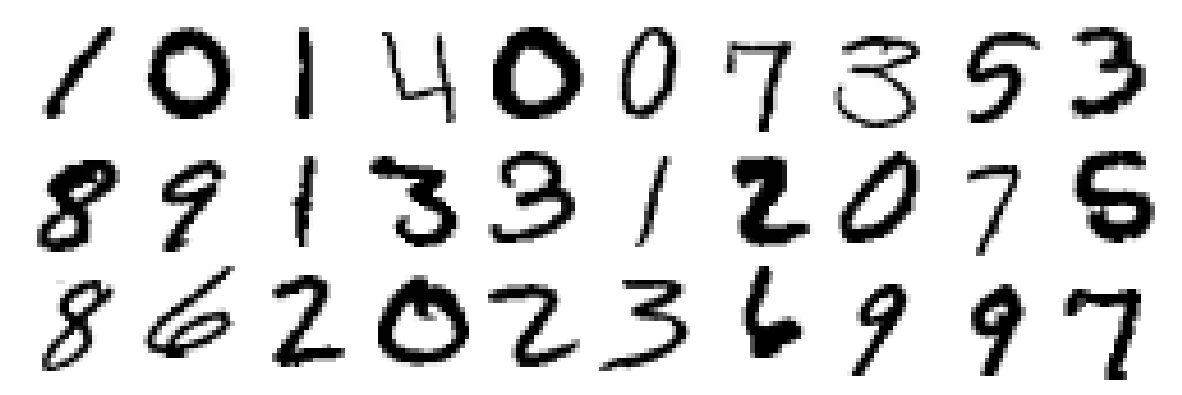

In [6]:
X_reshaped = X_train.reshape(-1,28,28,1) 

plt.figure(figsize=(15,5))
for i in range(30): 
    plt.subplot(3,10, i+1) 
    plt.imshow(X_reshaped[i, :, :, 0], cmap=plt.cm.binary) 
    plt.axis('off') 
plt.subplots_adjust(wspace=-0.1, hspace=-0.1) 
plt.show()   

In [7]:
print(X_train.dtype)

int64


In [8]:
X_train = X_train.astype('float32')

data_test= data_test.astype('float32')

In [9]:
X_train /= 255
data_test /= 255

In [10]:
#pip install tensorflow


In [11]:
#pip install keras

In [12]:
from keras.utils import to_categorical

In [13]:
y_train = to_categorical(y_train, num_classes=10)

In [14]:
print(y_train[0])  ##2

[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [15]:
print(y_train.shape)

(42000, 10)


In [16]:
print(data_test.shape)

(28000, 784)


In [17]:
# Spliting Data
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_test.shape)
print("y_train shape",y_train.shape)
print("y_test shape",y_test.shape)

x_train shape (37800, 784)
x_test shape (4200, 784)
y_train shape (37800, 10)
y_test shape (4200, 10)


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Activation


model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(256, activation='relu'))

model.add(Dense(10, activation='softmax'))

C:\Users\DELL\anaconda3\envs\new-my-environment\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [19]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 256)            │        33,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         2,570 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 136,074 (531.54 KB)

 Trainable params: 136,074 (531.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
model.compile(loss="categorical_crossentropy",
              optimizer="sgd",
              metrics = ['accuracy'])

In [21]:
history = model.fit(X_train, y_train, validation_split=0.1, epochs=50, batch_size=64)

Epoch 1/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5298 - loss: 1.7026 - val_accuracy: 0.8622 - val_loss: 0.5586
Epoch 2/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8702 - loss: 0.5046 - val_accuracy: 0.8939 - val_loss: 0.3822
Epoch 3/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.8921 - loss: 0.3857 - val_accuracy: 0.9037 - val_loss: 0.3287
Epoch 4/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9043 - loss: 0.3328 - val_accuracy: 0.9135 - val_loss: 0.2938
Epoch 5/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9135 - loss: 0.3014 - val_accuracy: 0.9193 - val_loss: 0.2733
Epoch 6/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9210 - loss: 0.2731 - val_accuracy: 0.9220 - val_loss: 0.2552
Epoch 7/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9251 - loss: 0.2644 - val_accuracy: 0.9228 - val_loss: 0.2474
Epoch 8/50
532/532 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9285 - loss: 0.2452 - val_accuracy: 0.

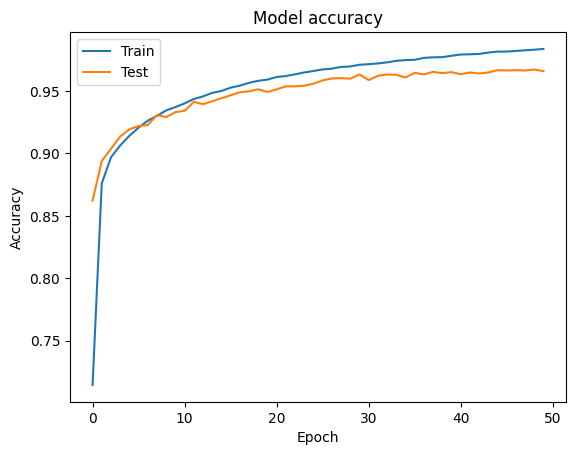

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()


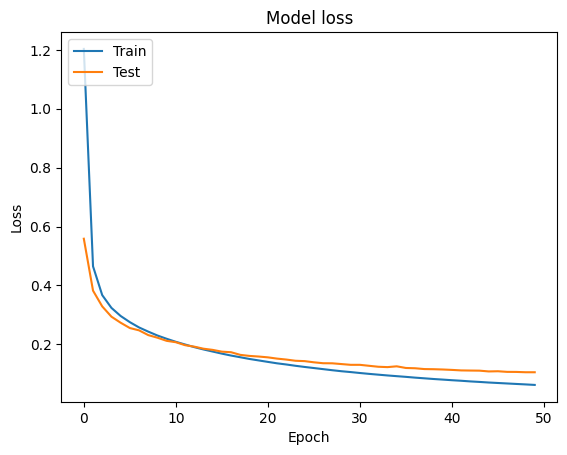

In [23]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

In [24]:
test_loss, test_acc = model.evaluate(X_test, y_test)

132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9709 - loss: 0.1096


In [25]:
print('Test accuracy:', round(test_acc,3))

Test accuracy: 0.97


132/132 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


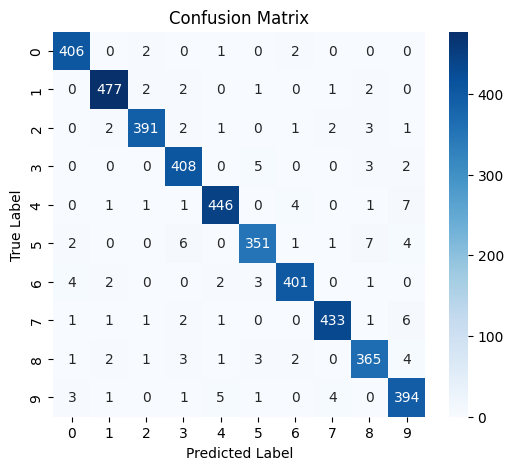

In [28]:
from sklearn.metrics import confusion_matrix

y_pred = model.predict(X_test) 
y_pred_classes = np.argmax(y_pred,axis = 1) # 0.1 0.0 0.1 0.0 0.05 0.7 0.05 0.0 0.0 0.0 = 5

y_true = np.argmax(y_test,axis = 1)  # 0 0 0 0 0 1 0 0 0 0 = 5

confusion_mtx = confusion_matrix(y_true, y_pred_classes)
# plot the confusion matrix
plt.figure(figsize=(6, 5))
sns.heatmap(confusion_mtx, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [32]:
y_pred

array([[3.2479224e-07, 7.6149460e-09, 5.2579389e-07, ..., 1.6180978e-11,
        2.6234306e-07, 4.2097943e-09],
       [3.9242035e-08, 6.1727851e-10, 7.9858610e-06, ..., 1.4701935e-03,
        1.0546219e-04, 9.9823618e-01],
       [7.3015370e-05, 1.4260721e-06, 7.4936026e-05, ..., 7.5488074e-06,
        6.3489233e-06, 5.6426532e-05],
       ...,
       [1.2459874e-06, 6.4996497e-10, 9.9999583e-01, ..., 3.2180716e-07,
        2.1544739e-07, 2.0911091e-09],
       [8.7941904e-04, 2.6758169e-04, 9.4651836e-01, ..., 9.3932040e-06,
        4.3840908e-02, 1.4103800e-05],
       [8.9662093e-01, 3.0251464e-04, 1.0828156e-03, ..., 3.4486384e-05,
        4.1999761e-02, 4.5854980e-04]], dtype=float32)

In [30]:
y_pred_classes

array([6, 9, 5, ..., 2, 2, 0], dtype=int64)

In [31]:
from sklearn.metrics import classification_report
print(classification_report(y_true, y_pred_classes, digits=4))

              precision    recall  f1-score   support

           0     0.9736    0.9878    0.9807       411
           1     0.9815    0.9835    0.9825       485
           2     0.9824    0.9702    0.9763       403
           3     0.9600    0.9761    0.9680       418
           4     0.9759    0.9675    0.9717       461
           5     0.9643    0.9435    0.9538       372
           6     0.9757    0.9709    0.9733       413
           7     0.9819    0.9709    0.9763       446
           8     0.9530    0.9555    0.9542       382
           9     0.9426    0.9633    0.9528       409

    accuracy                         0.9695      4200
   macro avg     0.9691    0.9689    0.9690      4200
weighted avg     0.9696    0.9695    0.9695      4200



In [33]:
final_pred = np.argmax(model.predict(data_test), axis = 1)

875/875 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step


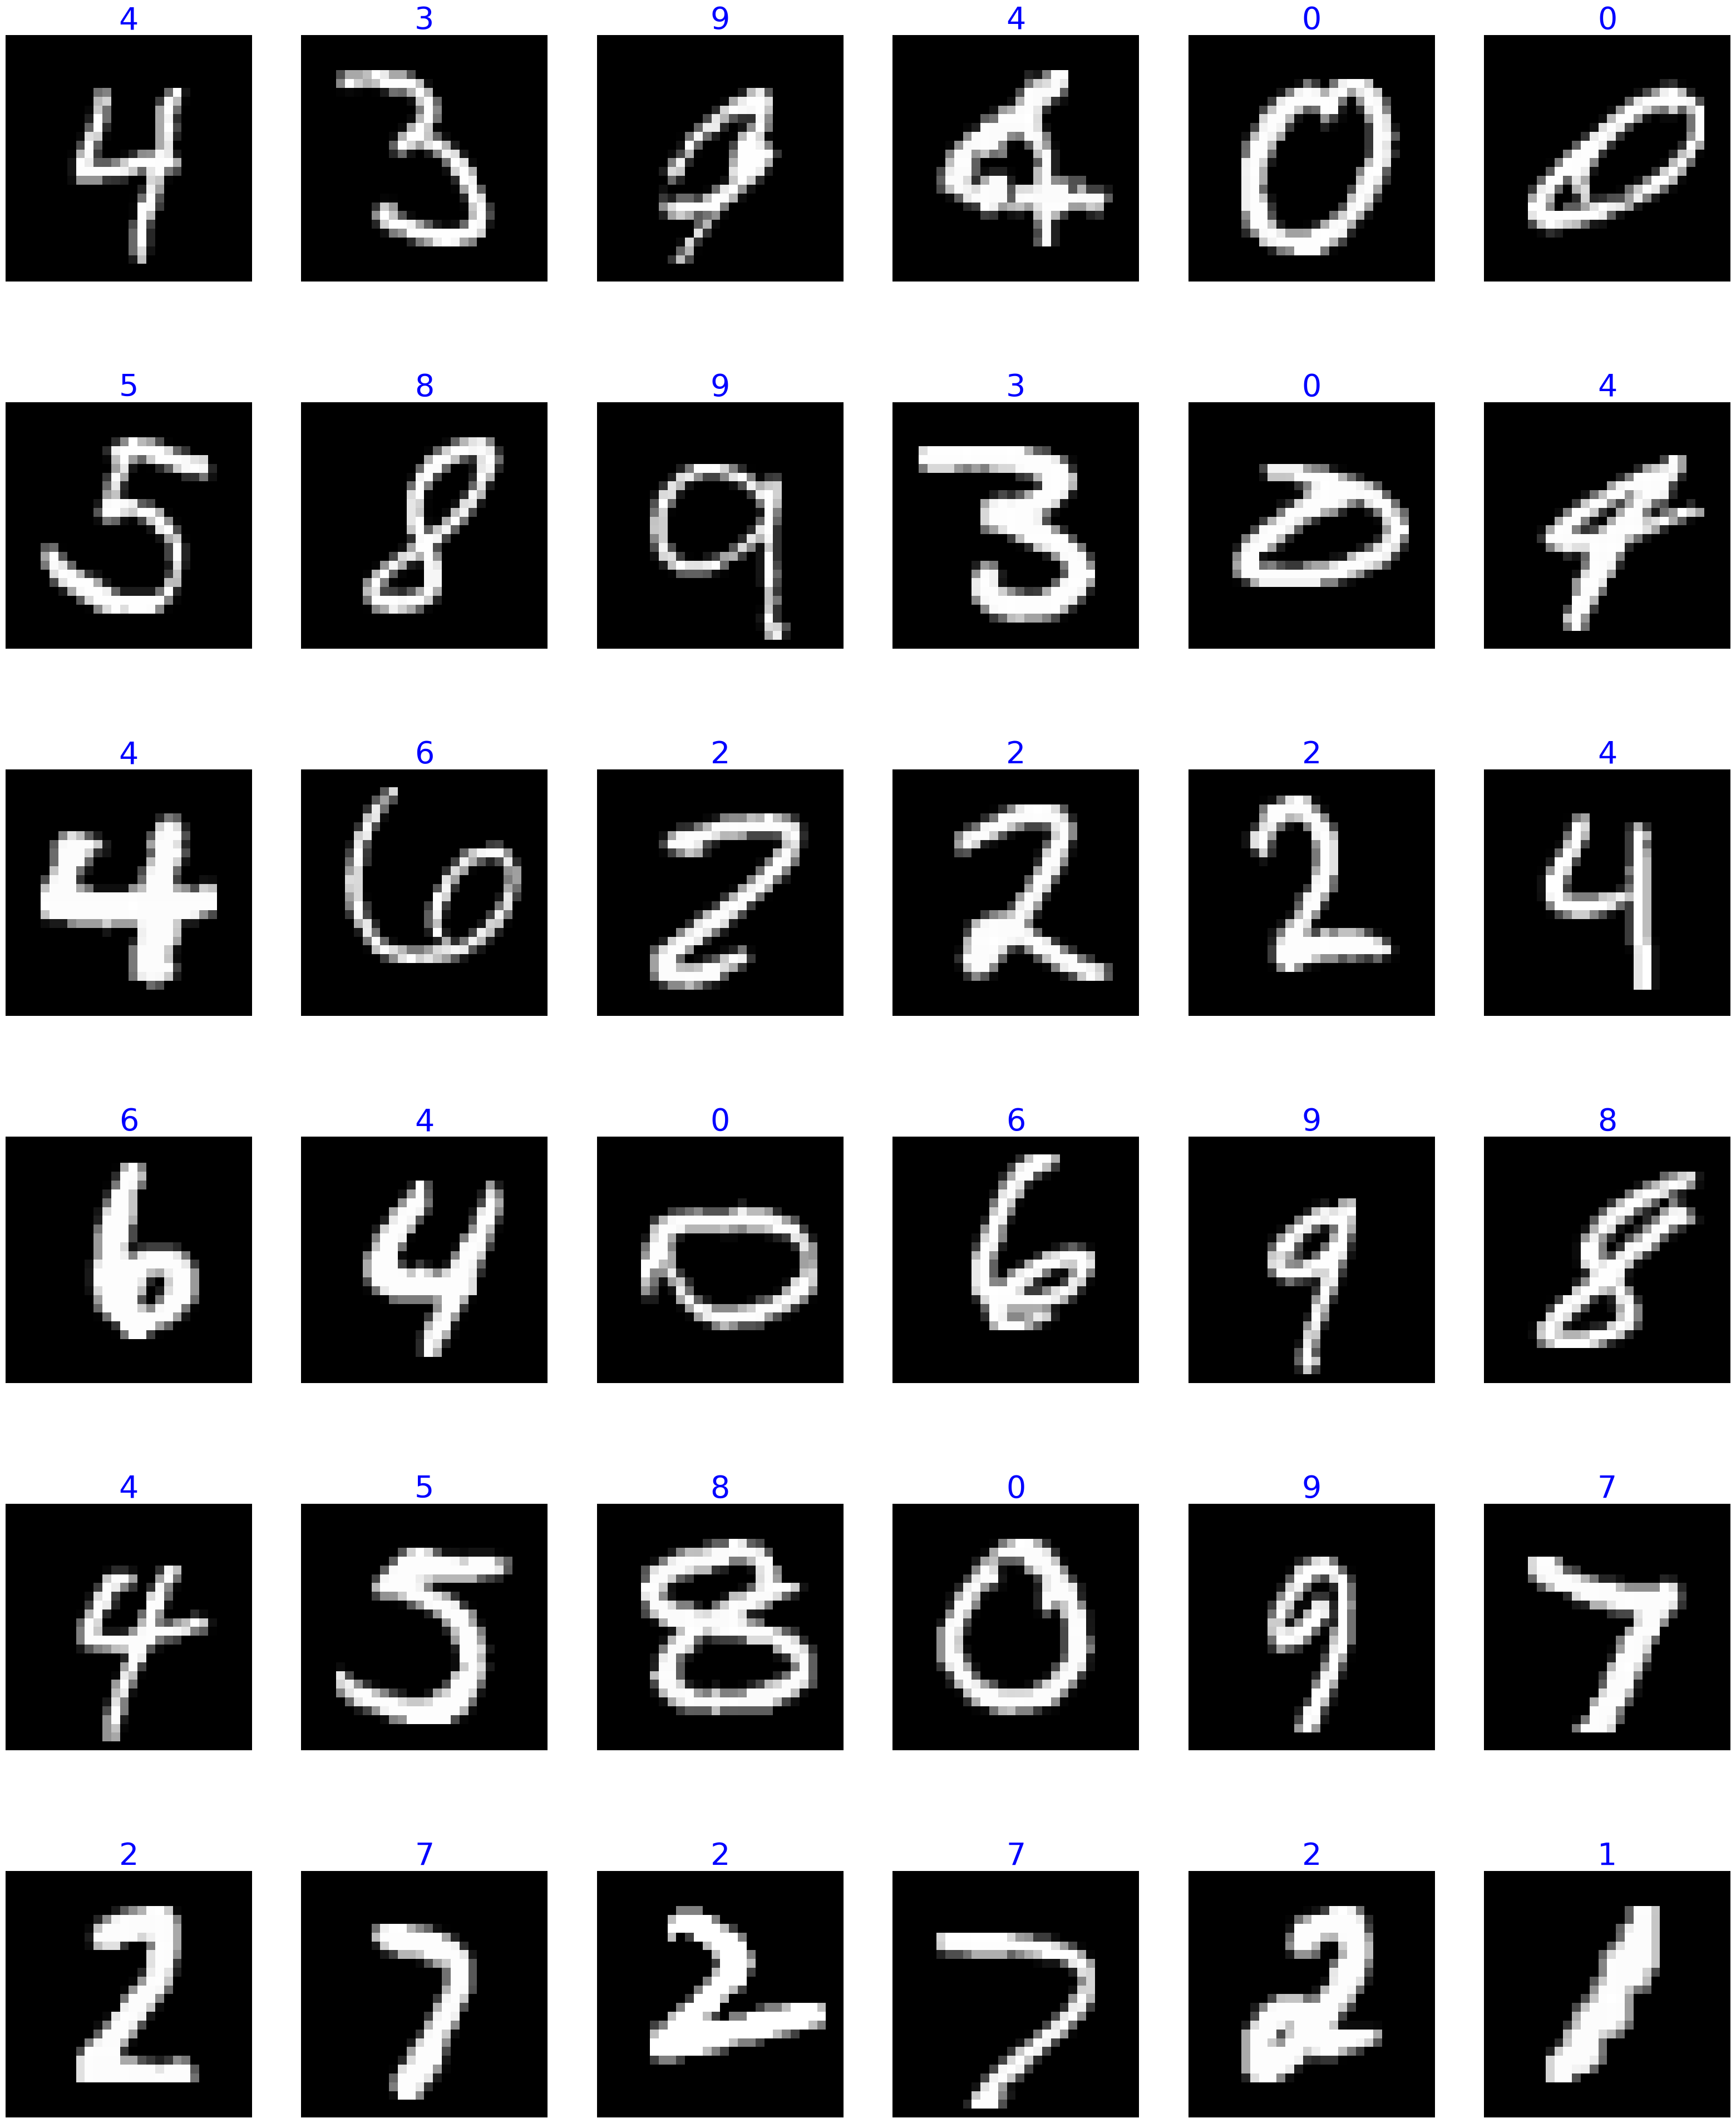

In [44]:

plt.figure(figsize=(40, 50))
for n, i in enumerate(list(np.random.randint(0, len(data_test), 36))):
    plt.subplot(6, 6, n+1)
    plt.imshow(data_test.iloc[i].values.reshape(28, 28), cmap='gray') 
    plt.title(final_pred[i], fontdict={'fontsize': 40, 'color': 'blue'})
    plt.axis('off')
plt.show()


In [37]:
np.argmax(final_pred[11])

0

In [41]:
print(final_pred[11])

7


In [39]:
np.sum(final_pred[11])

7

In [40]:
print(len(final_pred))   
print(len(data_test)) 

28000
28000


In [42]:
submission = pd.DataFrame(final_pred)
submission.index = np.arange(1, len(final_pred) + 1)
submission = submission.reset_index().rename(columns = {'index': 'ImageId', 0: 'Label'})
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,9
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [45]:
submission.to_csv('submission.csv', index=False)